<a href="https://colab.research.google.com/github/slapazromero/Coches_net/blob/main/Prediccion_coches_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importación de librerias.

In [22]:
import pandas as pd
import numpy as np

from google.colab import files
import zipfile
import io
import math

import os
import csv
import json
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt

# 2. Importación de dataframe.

In [5]:
df = pd.read_json('data.json', orient='table')

In [6]:
df

,fuelType,color,km,make,model,province,price,transmissionType,year,seller_type,cubicCapacity,doors,hp,bodyType
0,Diésel,COLOR_BLACK,170000.0,BMW,X3,Madrid,17490.0,TRANSMISSION_MANUAL,2015.0,profesional,1995.0,5.0,150.0,BODY_TYPE_SEDAN
1,Diésel,COLOR_WHITE,88000.0,BMW,Serie 5,Murcia,30500.0,TRANSMISSION_AUTOMATIC,2018.0,particular,1995.0,5.0,190.0,BODY_TYPE_SEDAN
2,Diésel,COLOR_BLACK,74500.0,BMW,X5,Alicante,74999.0,TRANSMISSION_AUTOMATIC,2020.0,profesional,2993.0,5.0,265.0,BODY_TYPE_SEDAN
3,Gasolina,COLOR_BLUE,39956.0,BMW,Serie 1,Madrid,32000.0,TRANSMISSION_AUTOMATIC,2021.0,particular,1499.0,5.0,136.0,BODY_TYPE_SEDAN
4,Diésel,COLOR_BLACK,96267.0,BMW,Serie 2 Gran Tourer,Madrid,17950.0,TRANSMISSION_MANUAL,2016.0,profesional,1995.0,5.0,150.0,BODY_TYPE_SEDAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13818,Eléctrico,COLOR_BLACK,129000.0,TESLA,Model S,Madrid,37900.0,TRANSMISSION_AUTOMATIC,2017.0,profesional,1499.0,5.0,525.0,BODY_TYPE_SEDAN
13819,Eléctrico,COLOR_WHITE,175000.0,TESLA,Model X,Madrid,59900.0,TRANSMISSION_AUTOMATIC,2016.0,profesional,1499.0,5.0,525.0,BODY_TYPE_4X4
13820,Eléctrico,COLOR_WHITE,77000.0,TESLA,Model 3,Barcelona,46900.0,TRANSMISSION_AUTOMATIC,2020.0,profesional,1499.0,4.0,490.0,BODY_TYPE_SEDAN
13821,Eléctrico,COLOR_WHITE,33000.0,TESLA,Model 3,Barcelona,44900.0,TRANSMISSION_AUTOMATIC,2020.0,profesional,1499.0,4.0,476.0,BODY_TYPE_SEDAN


<ipython-input-9-5879926ea6b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='BrBG', annot=True)


<Axes: >

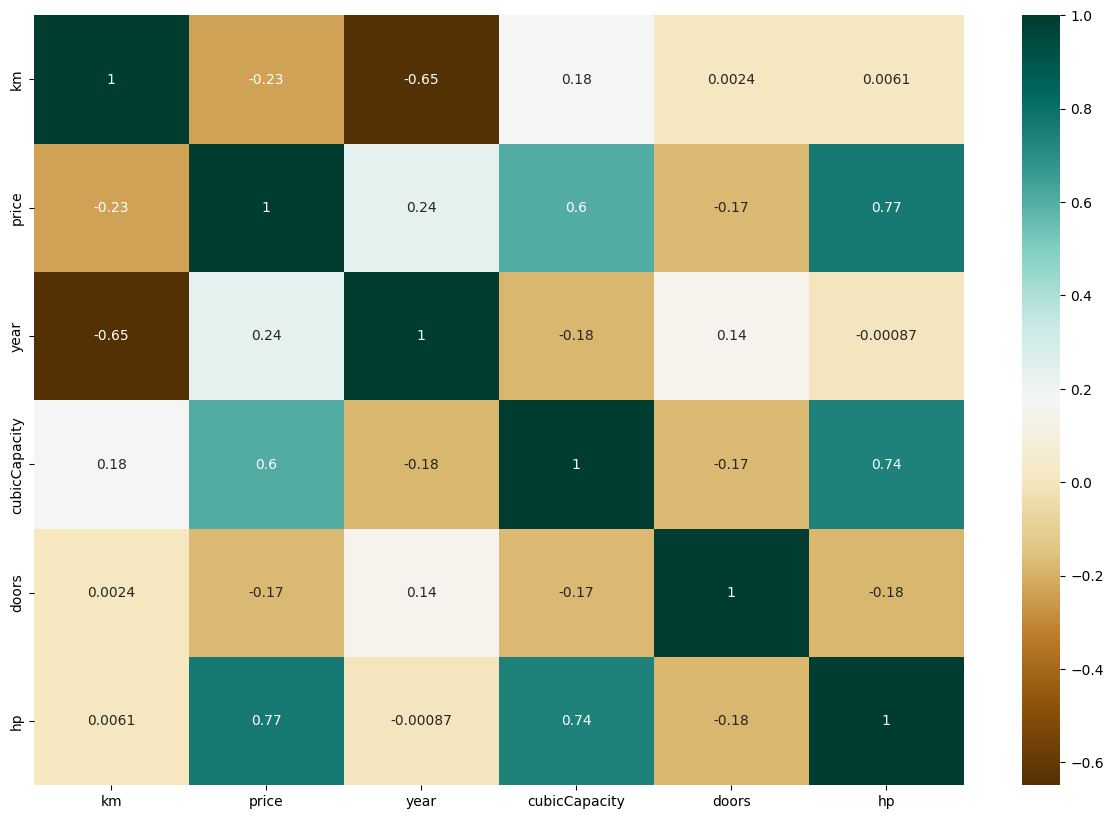

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='BrBG', annot=True)

In [10]:
caracteristicas = ['color', 'fuelType', 'make', 'model', 'province', 'transmissionType', 'year', 'seller_type', 'cubicCapacity', 'doors', 'hp', 'bodyType']

resultado = ['price']

In [11]:
x_df = df[caracteristicas]

y_df = df[resultado]

In [14]:
x_train,x_test,y_train, y_test = train_test_split(x_df, y_df,random_state=1,train_size=0.75)

# 3. Ingeniería de propiedades categóricas

Todas las propiedades categóricas se han de convertir a forma numérica de tal forma que puedan ser utilizadas por el algoritmo de aprendizaje.

https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

In [15]:
#las filas se convierten a formato de diccionario
train_dict = x_train[caracteristicas].to_dict(orient='records')
test_dict = x_test[caracteristicas].to_dict(orient='records')

In [16]:
test_dict[:1]

[{'color': 'COLOR_WHITE',
  'fuelType': 'Gasolina',
  'make': 'RENAULT',
  'model': 'Megane',
  'province': 'Madrid',
  'transmissionType': 'TRANSMISSION_MANUAL',
  'year': 2015.0,
  'seller_type': 'profesional',
  'cubicCapacity': 1198.0,
  'doors': 5.0,
  'hp': 115.0,
  'bodyType': 'BODY_TYPE_SEDAN'}]

Las propiedades categóricas se transforman.

In [17]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dv.fit(df.to_dict(orient='records'))
X_train = dv.transform(train_dict)
X_train[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.332e+03, 5.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       2.180e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [18]:
X_train.shape[1]

589

In [19]:
X_test = dv.transform(test_dict)
X_test[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.198e+03, 5.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

Para visualizar los valores de las propiedades categóricas.

Para visualizar la transformación de las propiedades categóricas.

In [20]:
dv.get_feature_names_out()

array(['bodyType=BODY_TYPE_4X4', 'bodyType=BODY_TYPE_BERLINA',
       'bodyType=BODY_TYPE_CABRIO', 'bodyType=BODY_TYPE_COUPE',
       'bodyType=BODY_TYPE_FAMILIAR', 'bodyType=BODY_TYPE_MINIVAN',
       'bodyType=BODY_TYPE_PICK_UP', 'bodyType=BODY_TYPE_SEDAN',
       'color=COLOR_BEIGE', 'color=COLOR_BLACK', 'color=COLOR_BLUE',
       'color=COLOR_BROWN', 'color=COLOR_GARNET', 'color=COLOR_GRAY',
       'color=COLOR_GREEN', 'color=COLOR_ORANGE', 'color=COLOR_PINK',
       'color=COLOR_PURPLE', 'color=COLOR_RED', 'color=COLOR_WHITE',
       'color=COLOR_YELLOW', 'cubicCapacity', 'doors', 'fuelType=Diésel',
       'fuelType=Eléctrico', 'fuelType=Gas licuado (GLP)',
       'fuelType=Gas natural (CNG)', 'fuelType=Gasolina',
       'fuelType=Híbrido', 'fuelType=Híbrido enchufable', 'hp', 'km',
       'make=ABARTH', 'make=ALFA ROMEO', 'make=AUDI', 'make=BMW',
       'make=CHEVROLET', 'make=CITROEN', 'make=CUPRA', 'make=DACIA',
       'make=DS', 'make=FERRARI', 'make=FIAT', 'make=FORD', 'make=

# 4. Red neuronal

In [21]:
model = Sequential()
input_shape = len(X_train[0])
print('Numero de entradas:',input_shape)

model.add(Dense(X_train.shape[1], input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(X_train.shape[1]*2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='glorot_uniform'))

model.summary()

Numero de entradas: 589
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 589)               347510    
                                                                 
 dense_1 (Dense)             (None, 1178)              695020    
                                                                 
 dense_2 (Dense)             (None, 1)                 1179      
                                                                 
Total params: 1,043,709
Trainable params: 1,043,709
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Definir el optimizador
optimizer = Adam(learning_rate=0.01)

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Definir early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=0)

# Definir reducción del learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_lr=0.001, mode='min', verbose=0)

batch_size=int(math.sqrt(len(X_train)))
print("batch_size:",batch_size)

# Entrenar el modelo con reducción del learning rate
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5000, batch_size=batch_size, callbacks=[early_stop,reduce_lr], use_multiprocessing=True)

batch_size: 101
Epoch 1/5000
103/103 [==============================] - 3s 25ms/step - loss: 221127648.0000 - val_loss: 105489400.0000 - lr: 0.0100
Epoch 2/5000
103/103 [==============================] - 2s 24ms/step - loss: 157240624.0000 - val_loss: 104496368.0000 - lr: 0.0100
Epoch 3/5000
103/103 [==============================] - 2s 23ms/step - loss: 155781408.0000 - val_loss: 101302920.0000 - lr: 0.0100
Epoch 4/5000
103/103 [==============================] - 3s 29ms/step - loss: 151069936.0000 - val_loss: 91810264.0000 - lr: 0.0100
Epoch 5/5000
103/103 [==============================] - 4s 36ms/step - loss: 146098832.0000 - val_loss: 92811944.0000 - lr: 0.0100
Epoch 6/5000
103/103 [==============================] - 2s 23ms/step - loss: 137388768.0000 - val_loss: 92919280.0000 - lr: 0.0100
Epoch 7/5000
103/103 [==============================] - 2s 23ms/step - loss: 133430120.0000 - val_loss: 92093072.0000 - lr: 0.0100
Epoch 8/5000
103/103 [==============================] - 2s 23ms/

In [24]:
# Evaluamos el modelo en los datos de entrenamiento
mse = model.evaluate(X_test, y_test)
print('Error cuadrático medio (MSE): %.2f' % (mse))

108/108 [==============================] - 1s 5ms/step - loss: 57668352.0000
Error cuadrático medio (MSE): 57668352.00


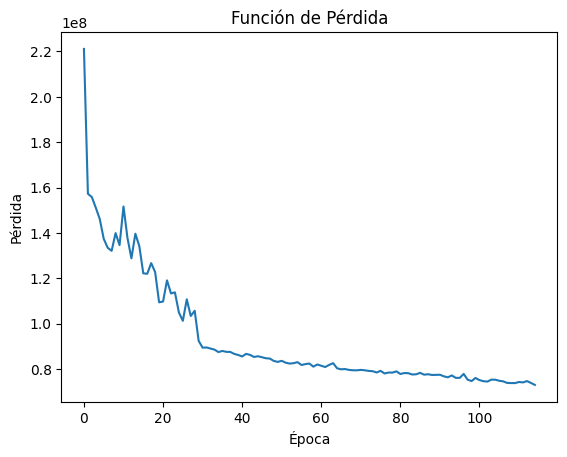

In [25]:
# Graficar la evolución de la función de pérdida
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

In [28]:
test_data = {'color': 'COLOR_BLUE', 'fueltype': 'Diésel', 'km': '34798', 'make': 'AUDI', 'model': 'A3', 'province': 'Almería', 'transmissiontype': 'TRANSMISSION_AUTOMATIC', 'year': '2017', 'seller_type': 'profesional', 'bodytype': 'BODY_TYPE_BERLINA', 'cubiccapacity': '1598', 'doors': '5', 'hp': '116'}
test_data = dv.transform([dict(test_data)])
model.predict(test_data)

1/1 [==============================] - 0s 21ms/step


array([[2756.1704]], dtype=float32)

108/108 [==============================] - 1s 9ms/step


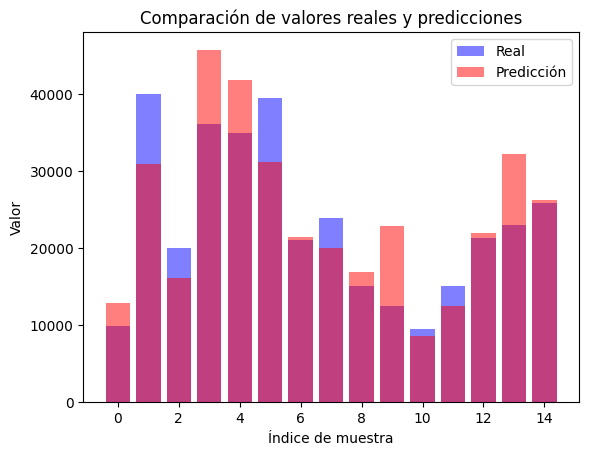

In [51]:
y_pred = model.predict(X_test)
import numpy as np

# Crear un array de índices para los datos de prueba
indices = np.arange(15)

# Crear un gráfico de barras comparando los valores reales con las predicciones
plt.bar(indices, y_test.values.flatten()[:15], color='b', alpha=0.5, label='Real')
plt.bar(indices, y_pred.flatten()[:15], color='r', alpha=0.5, label='Predicción')
plt.title('Comparación de valores reales y predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [30]:
X_test[:1]

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.198e+03, 5.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

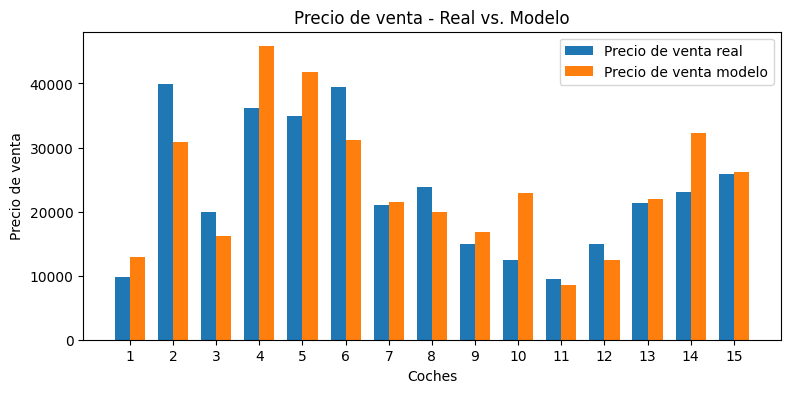

In [52]:
ind = np.arange(15)
width = 0.35

plt.figure(figsize=(9,4))
plt.bar(ind, y_test.values.flatten()[:15], width, label='Precio de venta real')
plt.bar(ind+width, y_pred.flatten()[:15], width, label='Precio de venta modelo')

plt.xticks(ind+width/2, np.arange(1, 16))
plt.legend(loc='best')

plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Modelo')

plt.show()
     

# 5. Exportación de modelo.

In [53]:
with open('dict_vectorizer_coches_net.pck', 'wb') as f:
  pickle.dump((dv), f)
model.save('modelo_keras_coches_net.hdf5')

In [54]:
with open('dict_vectorizer_coches_net.pck', 'rb') as f:
  dv_read = pickle.load(f)
model_read = tf.keras.models.load_model('modelo_keras_coches_net.hdf5')

In [55]:
dv_read

DictVectorizer(sparse=False)

In [56]:
model_read

In [57]:
files_to_compress = ['dict_vectorizer_coches_net.pck','modelo_keras_coches_net.hdf5']
with zipfile.ZipFile('model_with_dict_vectorizer_coches_net.zip', 'w') as zip:
  for file in files_to_compress:
    zip.write(file)

files.download('model_with_dict_vectorizer_coches_net.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>